In [6]:
# Display the first few lines of the CSV file
with open('API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv', 'r') as file:
    for _ in range(10):
        print(file.readline())



﻿"Data Source","World Development Indicators",



"Last Updated Date","2024-05-30",



"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023",

"Aruba","ABW","Population, total","SP.POP.TOTL","54608","55811","56682","57475","58178","58782","59291","59522","59471","59330","59106","58816","58855","59365","60028","60715","61193","61465","61738","62006","62267","62614","63116","63683","64174","64478","64553","64450","64332","64596","65712","67864","70192","72360","74710","77050","79417","81858","84355","86867","89101","90691","91781","92701"

In [7]:
import pandas as pd

# Adjust skiprows based on the structure inspected in the previous step
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv', skiprows=4)
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN


Saving Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv to Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_372468 (2).csv
Saving Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv to Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_372468 (2).csv
Saving API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv to API_SP.POP.TOTL_DS2_en_csv_v2_372468 (3).csv
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.

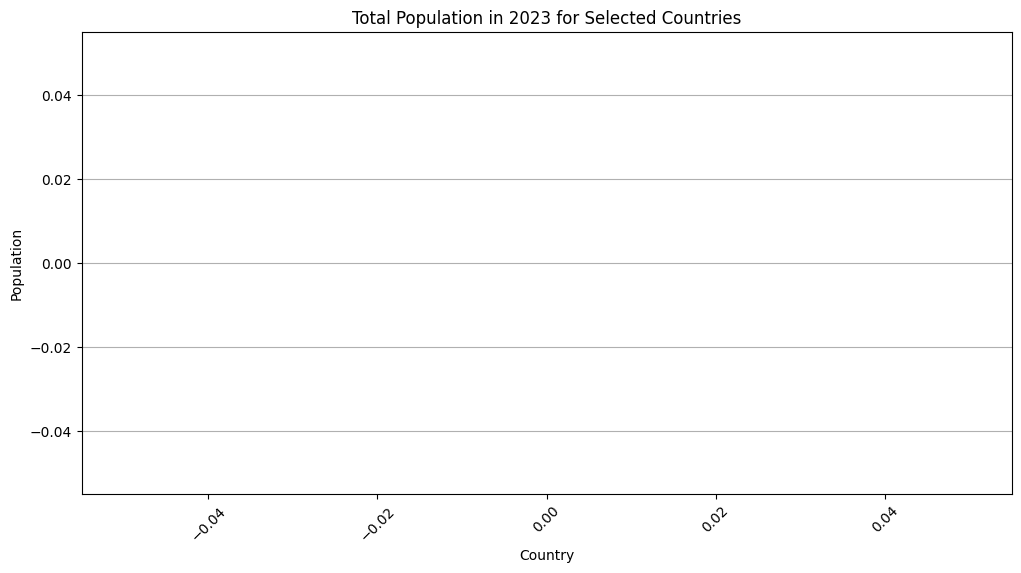

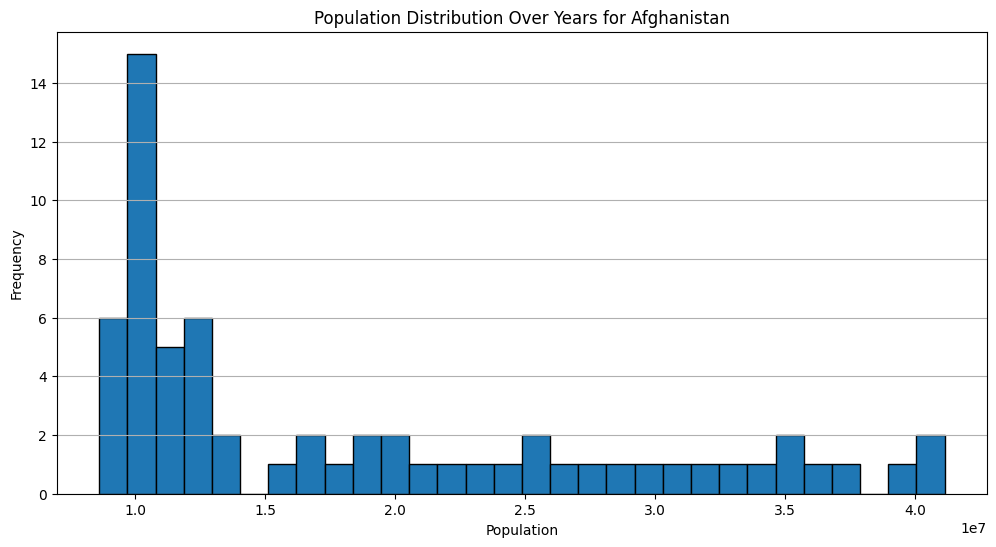

In [10]:
# Install necessary libraries
!pip install pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import zipfile

# Upload dataset
uploaded = files.upload()

# Extract the zip file
with zipfile.ZipFile('API_SP.POP.TOTL_DS2_en_csv_v2_372468.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the specific CSV file, skipping the first few rows based on the structure
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_372468.csv', skiprows=4)

# Display the first few rows of the dataframe to understand its structure
print(data.head())
print(data.columns)

# Remove trailing commas in the CSV file and reload data
data = data.replace({r',\s*$': ''}, regex=True)

# Filter data for selected countries and latest available year (2023)
selected_countries = ['Aruba', 'Afghanistan', 'Angola', 'Africa Eastern and Southern', 'Africa Western and Central']
latest_year = '2023'
filtered_data = data[data['Country Name'].isin(selected_countries)][['Country Name', latest_year]].dropna()

# Rename the columns for easier plotting
filtered_data.columns = ['Country', 'Population']

# Convert population to numeric (in case it's not)
filtered_data['Population'] = pd.to_numeric(filtered_data['Population'])

# Bar chart of total population in the latest year for selected countries
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Country'], filtered_data['Population'], color='skyblue', edgecolor='black')
plt.title('Total Population in 2023 for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Histogram of population distribution over years for a selected country (e.g., Afghanistan)
selected_country = 'Afghanistan'
country_data = data[data['Country Name'] == selected_country].iloc[0, 4:-1].dropna()

# Convert the population values to numeric
country_data = pd.to_numeric(country_data)

plt.figure(figsize=(12, 6))
plt.hist(country_data, bins=30, edgecolor='black')
plt.title(f'Population Distribution Over Years for {selected_country}')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

